# Import

In [24]:
# import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings



data = pd.read_csv('training.csv')

df= pd.DataFrame(data)
oil_peak_rate = data['OilPeakRate']
drop_columns = ['Unnamed: 0','average_frac_fluid_per_stage', 'pad_id', 'average_proppant_per_stage', 'average_stage_length', 'number_of_stages', 'frac_type', 'batch_frac_classification', 'standardized_operator_name']
df = df.drop(columns=drop_columns, axis=1)



warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib import rcParams
rcParams["figure.figsize"] = 12, 6
sns.set_style('darkgrid')


# Understanding Data

In [25]:
#Understanding data
df.head()

surface_x    surface_y         bh_x         bh_y  \
0  1383493.751  717329.2368  1382854.564  712767.3700   
1  1380344.035  711916.2732  1379738.429  707860.5643   
2  1379915.895  717845.0063  1379274.644  713471.9952   
3  1383567.443  706640.2010  1382891.477  702068.3838   
4  1378962.585  702623.9787  1379643.546  707204.9131   

   gross_perforated_length  total_proppant   total_fluid  true_vertical_depth  \
0              3963.582677      76000.0000           NaN          8712.598425   
1              3179.133858     113000.0000  5.610964e+05          8627.952756   
2              3810.039370     286571.4286  1.621424e+06          8801.181102   
3              3723.425197     106878.9286  4.377134e+05          8635.826772   
4              3811.023622     112789.7143  6.229802e+05          8664.370079   

  ffs_frac_type  proppant_intensity  ...  frac_fluid_to_proppant_ratio  \
0           NaN           19.174572  ...                           NaN   
1           NaN           35.544272  ...                      4.965455   
2           NaN           75.214821  ...                      5.658008   
3           NaN           28.704465  ...                      4.095414   
4           NaN           29.595648  ...                      5.523377   

   bin_lateral_length  relative_well_position  well_family_relationship  \
0                 1.0         Standalone Well           Standalone Well   
1                 1.0              Outer Well         Infill Child Well   
2                 1.0         Standalone Well           Standalone Well   
3                 1.0         Standalone Well           Standalone Well   
4                 1.0              Outer Well         Infill Child Well   

  frac_seasoning horizontal_midpoint_x  horizontal_midpoint_y  \
0            NaN           1383030.678            714796.3610   
1            NaN           1379965.126            709541.7145   
2           92.0           1379357.250            715381.2327   
3            NaN           1383099.610            704058.8508   
4            NaN           1379546.414            705150.7519   

   horizontal_toe_x  horizontal_toe_y  OilPeakRate  
0       1382668.912       712798.4321    46.623023  
1       1379630.025       707907.6708    59.750009  
2       1378960.372       713530.4490    10.785716  
3       1382727.299       702098.4882   123.797638  
4       1379987.487       707123.7258   102.309540  

[5 rows x 22 columns]

In [26]:
df.shape

(29692, 22)

In [27]:
df.columns

Index(['surface_x', 'surface_y', 'bh_x', 'bh_y', 'gross_perforated_length',
       'total_proppant', 'total_fluid', 'true_vertical_depth', 'ffs_frac_type',
       'proppant_intensity', 'frac_fluid_intensity',
       'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio',
       'bin_lateral_length', 'relative_well_position',
       'well_family_relationship', 'frac_seasoning', 'horizontal_midpoint_x',
       'horizontal_midpoint_y', 'horizontal_toe_x', 'horizontal_toe_y',
       'OilPeakRate'],
      dtype='object')

In [28]:
df.dtypes

surface_x                       float64
surface_y                       float64
bh_x                            float64
bh_y                            float64
gross_perforated_length         float64
total_proppant                  float64
total_fluid                     float64
true_vertical_depth             float64
ffs_frac_type                    object
proppant_intensity              float64
frac_fluid_intensity            float64
proppant_to_frac_fluid_ratio    float64
frac_fluid_to_proppant_ratio    float64
bin_lateral_length              float64
relative_well_position           object
well_family_relationship         object
frac_seasoning                  float64
horizontal_midpoint_x           float64
horizontal_midpoint_y           float64
horizontal_toe_x                float64
horizontal_toe_y                float64
OilPeakRate                     float64
dtype: object

In [29]:
# Tidy data

df.isna().sum()

surface_x                           0
surface_y                           0
bh_x                             2087
bh_y                             2087
gross_perforated_length          7557
total_proppant                  10612
total_fluid                     10616
true_vertical_depth              1495
ffs_frac_type                   15107
proppant_intensity              10721
frac_fluid_intensity            10746
proppant_to_frac_fluid_ratio    11036
frac_fluid_to_proppant_ratio    11036
bin_lateral_length               7557
relative_well_position           9225
well_family_relationship         9225
frac_seasoning                  14924
horizontal_midpoint_x            1001
horizontal_midpoint_y            1001
horizontal_toe_x                  711
horizontal_toe_y                  711
OilPeakRate                     10386
dtype: int64

# Cleaning Data

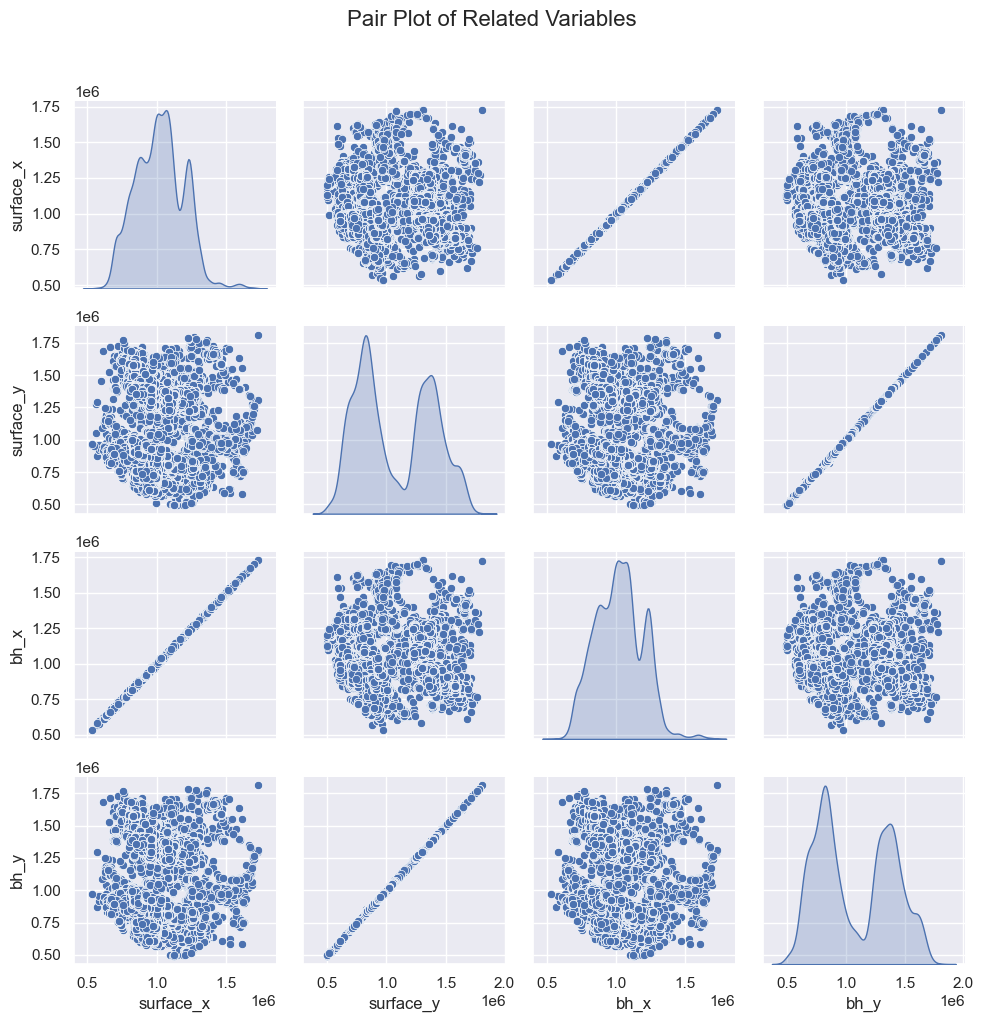

In [30]:
# Select the relevant columns
subset_columns_1 = ['surface_x', 'surface_y', 'bh_x', 'bh_y']

# Create a subset DataFrame with the selected columns
subset_df = df[subset_columns_1]

# Set a custom color palette
custom_palette = sns.color_palette("rocket", as_cmap=True)

# Pair plot with customization
sns.pairplot(subset_df, markers='o', diag_kind='kde')

# Add titles and labels
plt.suptitle('Pair Plot of Related Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

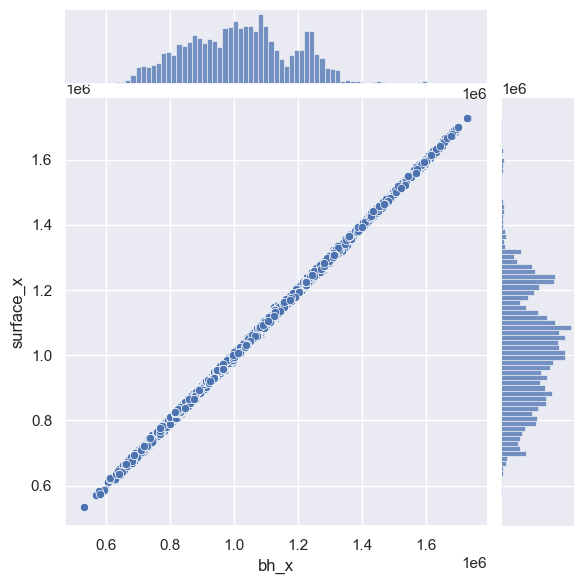

In [31]:

sns.jointplot(x = "bh_x", y = "surface_x", data =subset_df);
plt.show()


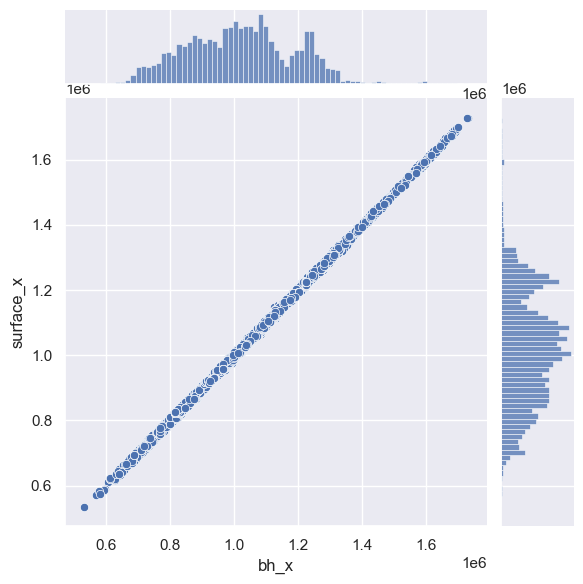

In [32]:
from sklearn.linear_model import LinearRegression

# Create a subset DataFrame with non-missing values in 'surface_x' and 'bh_x'
subset_df = df[['surface_x', 'bh_x']].dropna()

# Separate features (X) and target variable (y)
X = subset_df[['surface_x']]
y = subset_df['bh_x']

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Identify rows with missing values in 'bh_x'
missing_bh_x_rows = df['bh_x'].isna()

# Use the model to predict missing values in 'bh_x'
df.loc[missing_bh_x_rows, 'bh_x'] = model.predict(df.loc[missing_bh_x_rows, ['surface_x']])

sns.jointplot(x = "bh_x", y = "surface_x", data =subset_df);
plt.show()


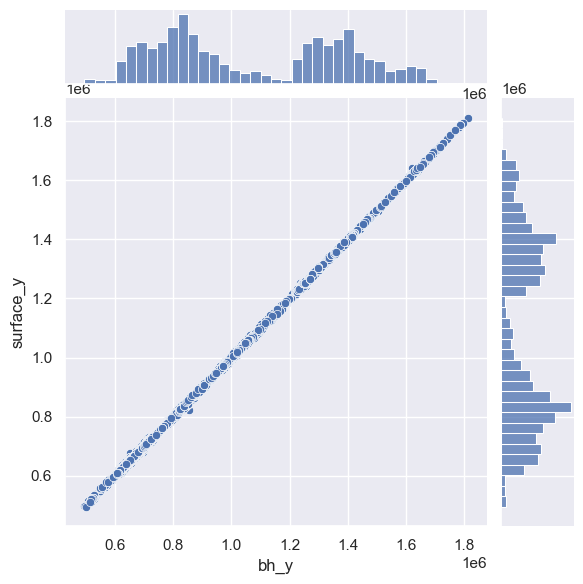

In [33]:
# Create a subset DataFrame with non-missing values in 'surface_y' and 'bh_y'
subset_df_y = df[['surface_y', 'bh_y']].dropna()

# Separate features (X) and target variable (y)
X_y = subset_df_y[['surface_y']]
y_y = subset_df_y['bh_y']

# Create a linear regression model
model_y = LinearRegression()
model_y.fit(X_y, y_y)

# Identify rows with missing values in 'bh_y'
missing_bh_y_rows = df['bh_y'].isna()

# Use the model to predict missing values in 'bh_y'
df.loc[missing_bh_y_rows, 'bh_y'] = model_y.predict(df.loc[missing_bh_y_rows, ['surface_y']])


sns.jointplot(x = "bh_y", y = "surface_y", data =df);
plt.show()

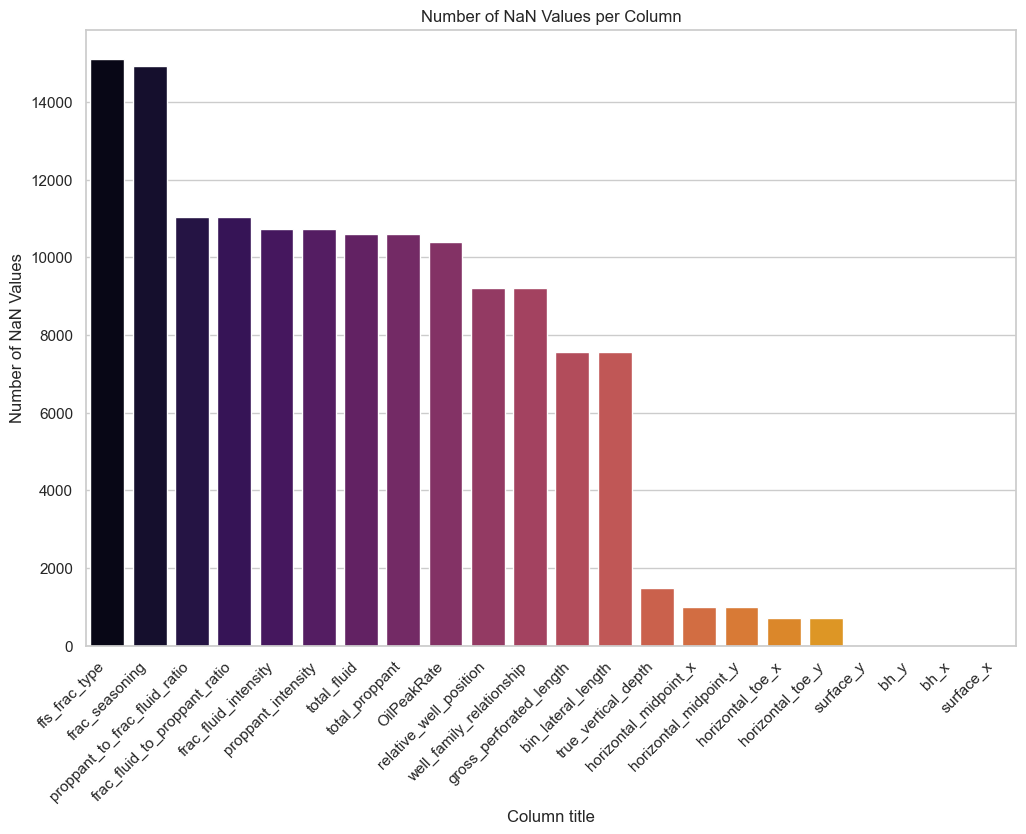

In [34]:
# Missing values:
# Calculate the number of NaN values per column with raw data and sort descending order
sorted_nans_per_column = (df.isna().sum()).sort_values(ascending=False)

# Create a bar plot using Seaborn 
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Define x, y, and palette
nanplt = sns.barplot(x=sorted_nans_per_column.index, y=sorted_nans_per_column.values, palette="inferno")

# Set labels
nanplt.set(xlabel='Column title', ylabel='Number of NaN Values', title='Number of NaN Values per Column')

# Align titles 45 degrees to the right
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
df.dropna(subset=['OilPeakRate'], inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
def find_mean_std(df, col):
    mean = df[col].mean()
    std = df[col].std()
    return mean, std

for col in df.columns:  
    if(df[col].dtype == 'object'):
        continue
    mean, std = find_mean_std(df, col)
    df[col] = df[col].apply(lambda x: mean if x > mean + 3 * std else x)
    df[col] = df[col].apply(lambda x: mean if x < mean - 3 * std else x)



In [36]:
df.isna().sum()

surface_x                          0
surface_y                          0
bh_x                               0
bh_y                               0
gross_perforated_length          158
total_proppant                  1394
total_fluid                     1440
true_vertical_depth              105
ffs_frac_type                   4996
proppant_intensity              1434
frac_fluid_intensity            1485
proppant_to_frac_fluid_ratio    1805
frac_fluid_to_proppant_ratio    1806
bin_lateral_length               158
relative_well_position             0
well_family_relationship           0
frac_seasoning                  4827
horizontal_midpoint_x             57
horizontal_midpoint_y             57
horizontal_toe_x                  57
horizontal_toe_y                  57
OilPeakRate                        0
dtype: int64

# Plotting Data

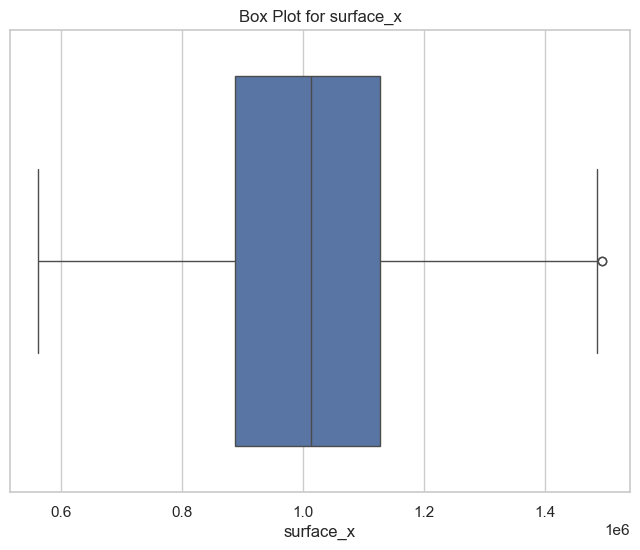

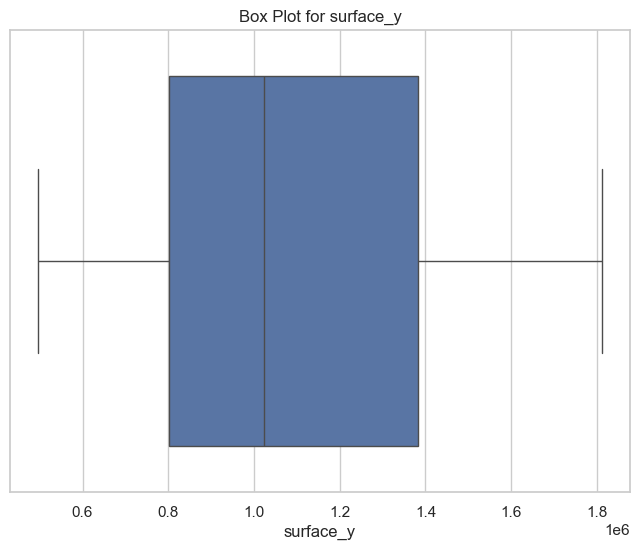

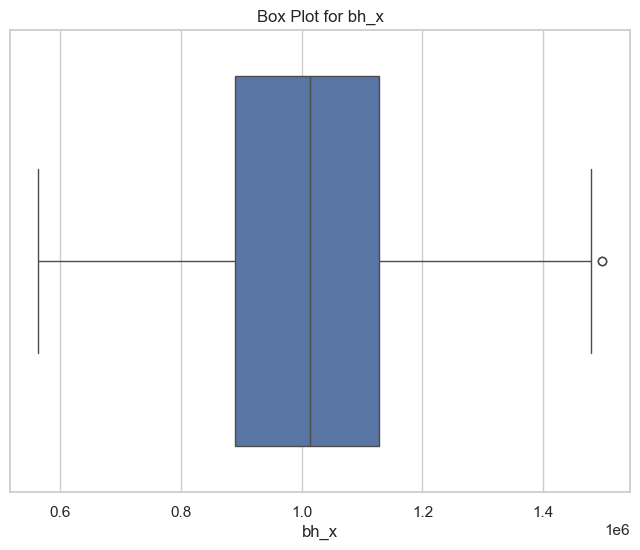

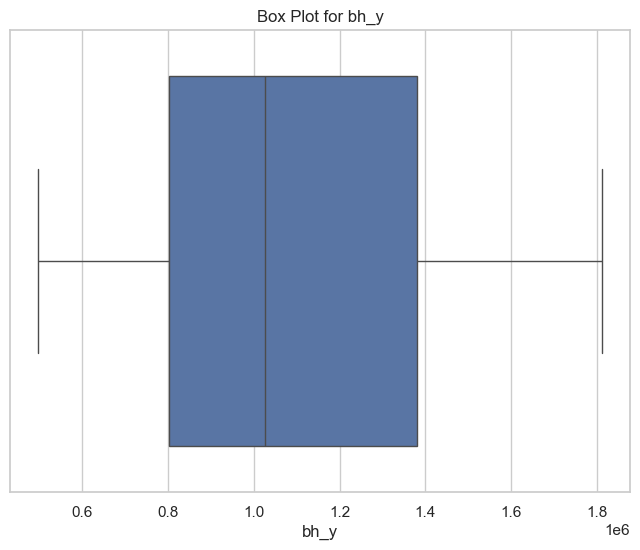

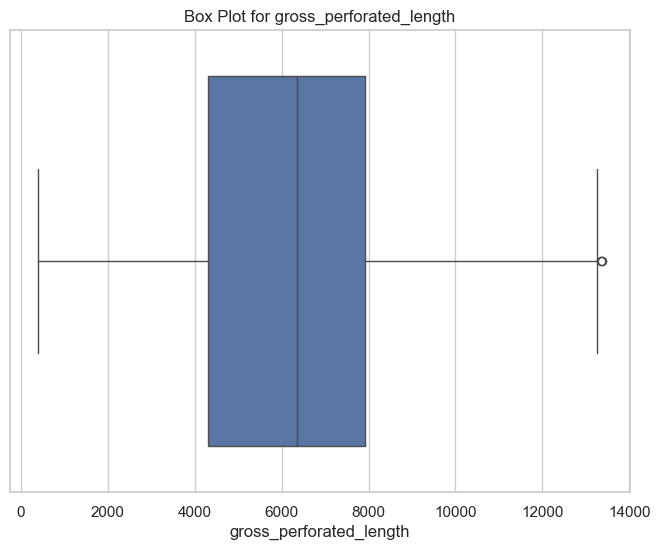

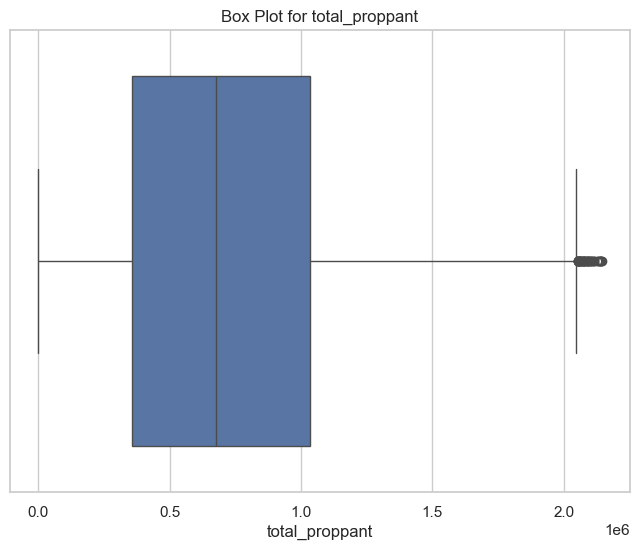

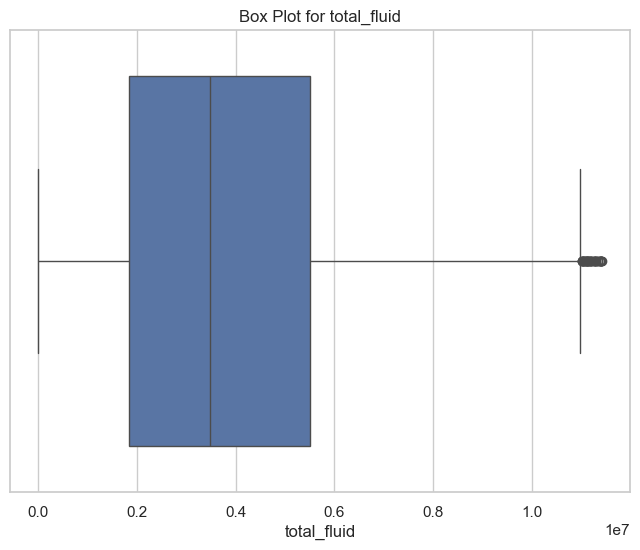

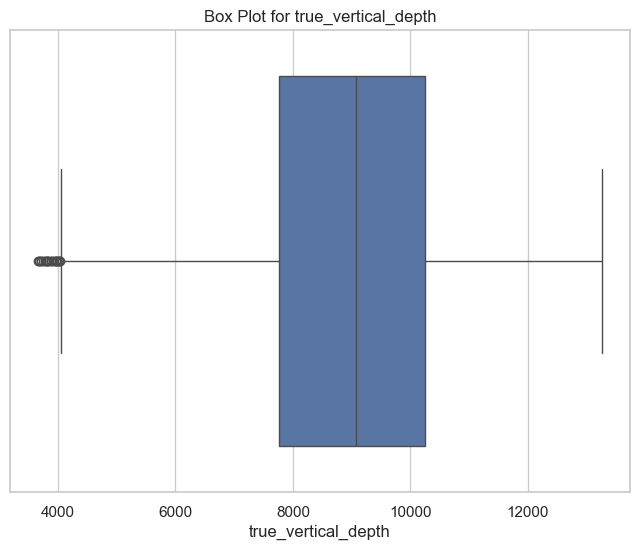

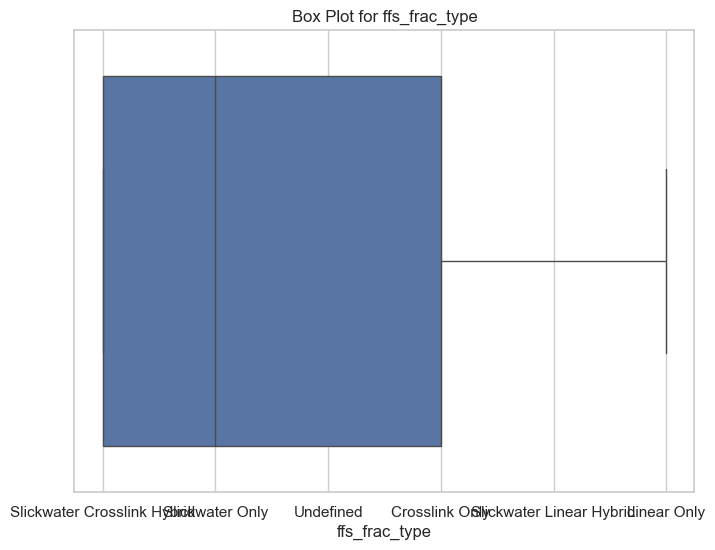

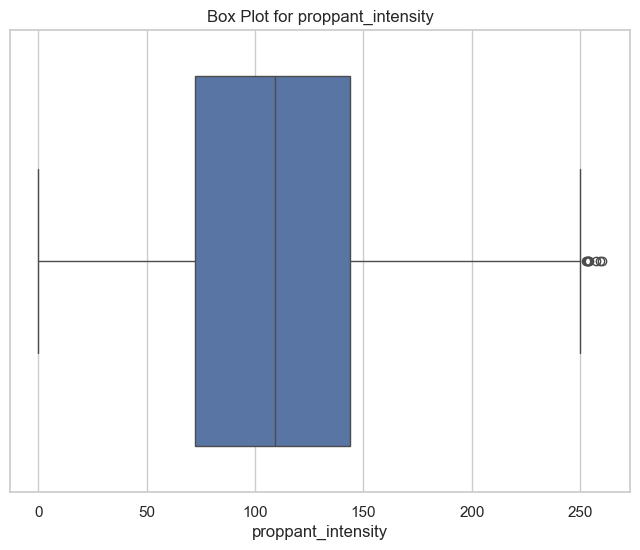

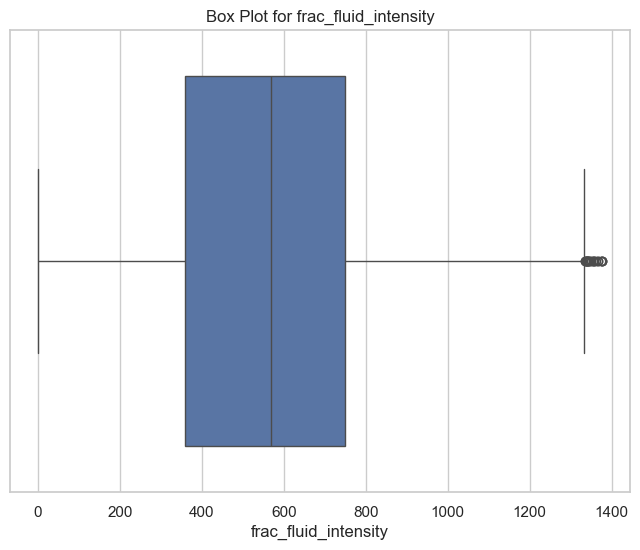

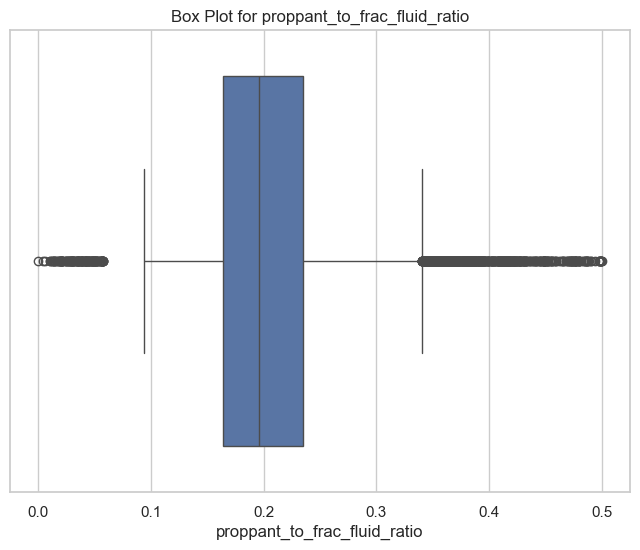

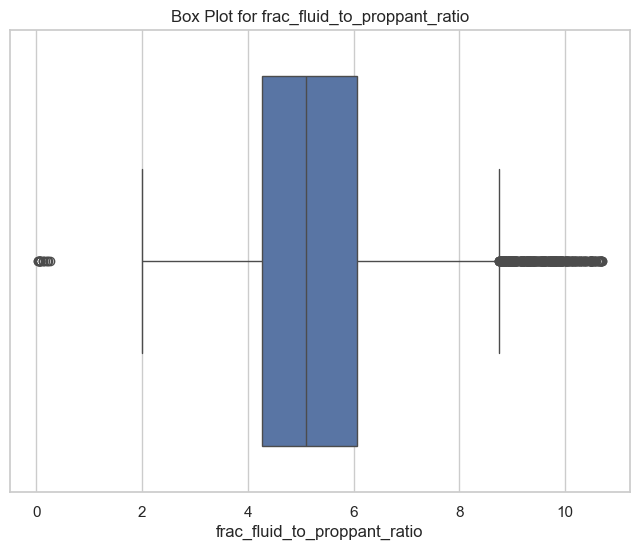

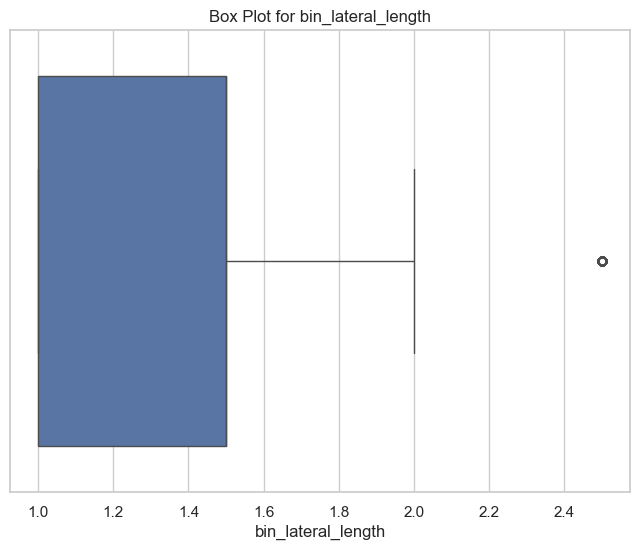

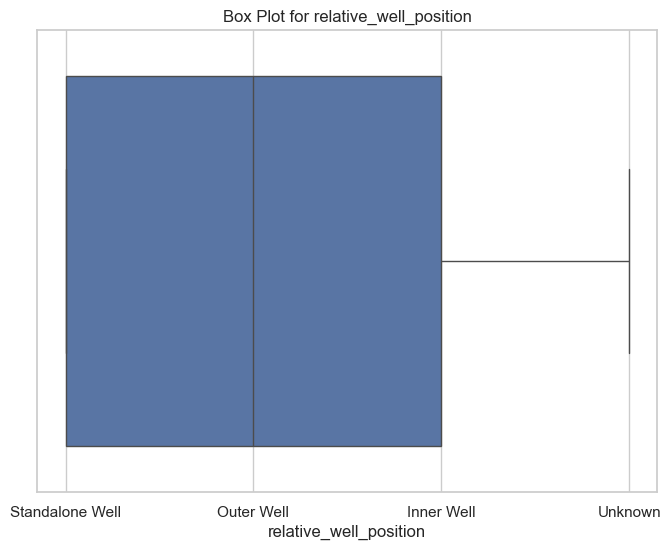

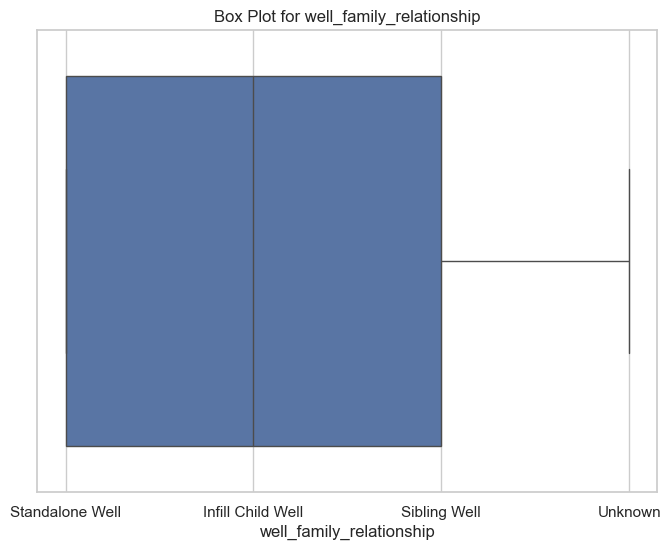

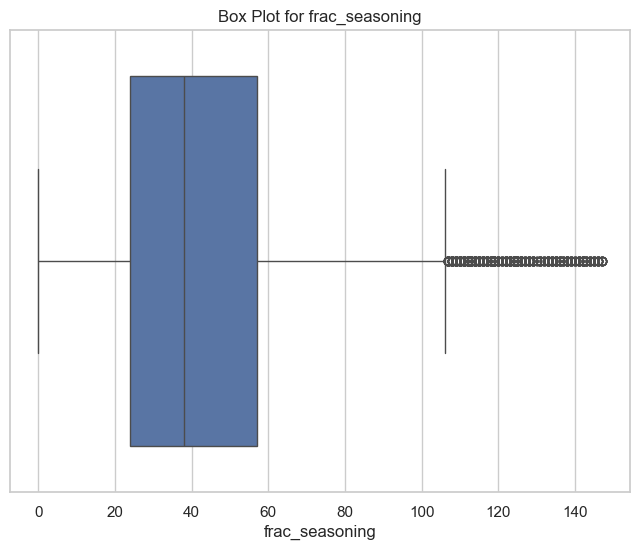

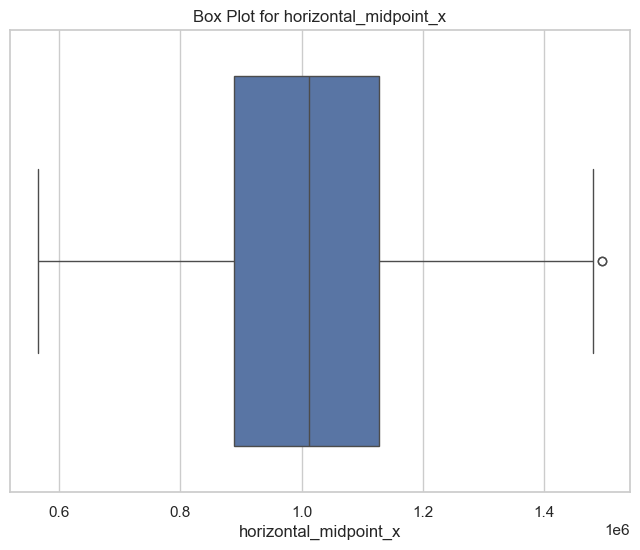

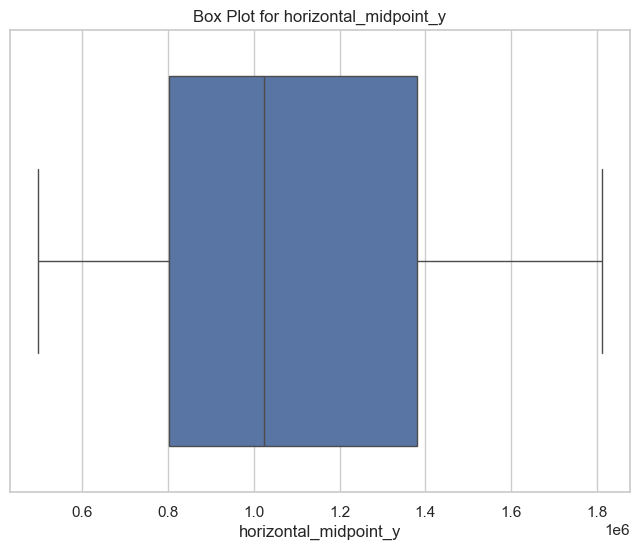

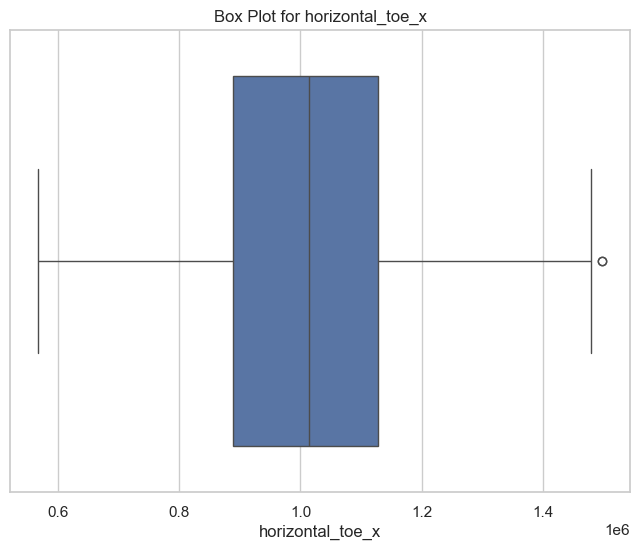

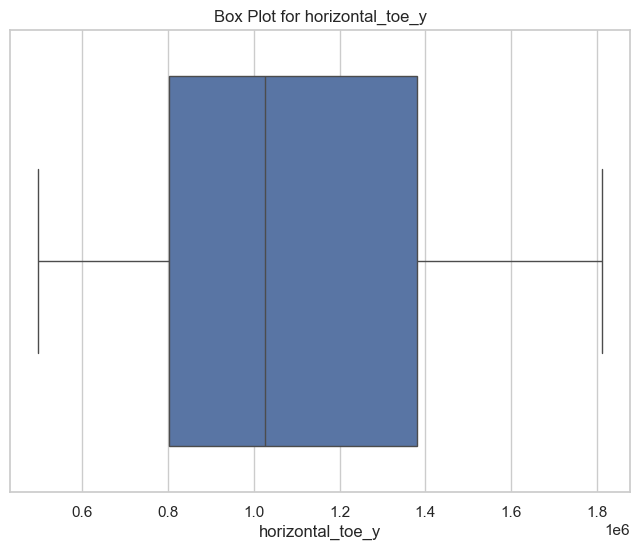

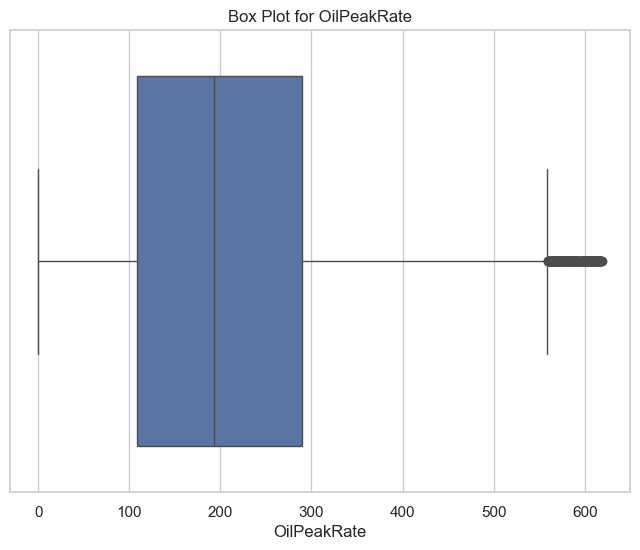

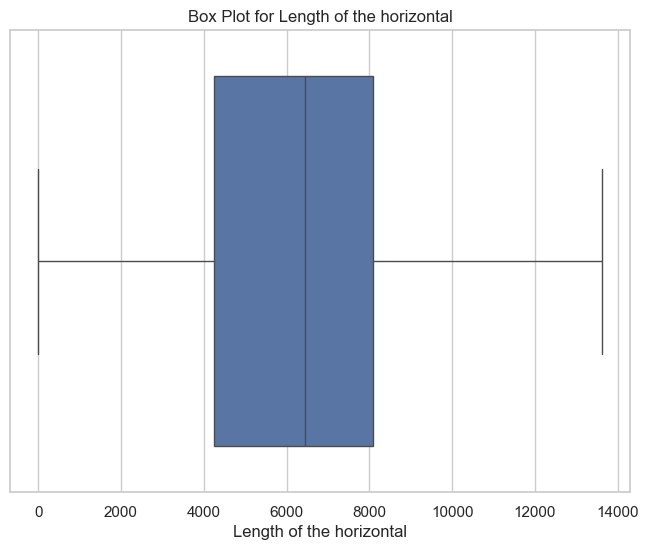

In [37]:
df['Length of the horizontal'] = (((df['horizontal_midpoint_x']-df['horizontal_toe_x'])**2+(df['horizontal_midpoint_y']-df['horizontal_toe_y'])**2)**0.5) *2
df['Length of the horizontal']
#Outliers
# Define the threshold for outliers
threshold = 3

# Iterate through each numeric column in the DataFrame
for column in df.select_dtypes(include=np.number).columns:
    # Calculate mean and standard deviation for the current column
    mean_value = df[column].mean()
    std_dev = df[column].std()
    
    # Identify outliers based on the threshold
    outliers = (df[column] - mean_value).abs() > threshold * std_dev
    
    # Remove outliers from the DataFrame
    df = df[~outliers]
# Get the list of column names in the DataFrame
columns = df.columns


# Generate box plots for each column separately
for column in columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

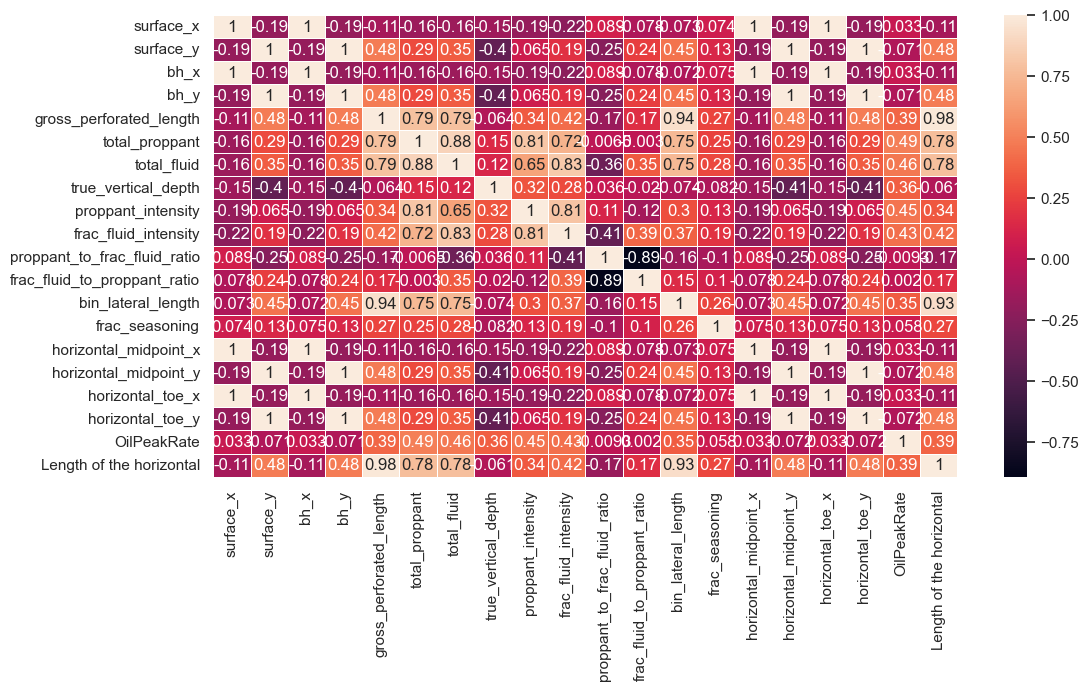

In [38]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
sns.heatmap(newdf.corr(), annot=True, linewidths=.5)
plt.show()

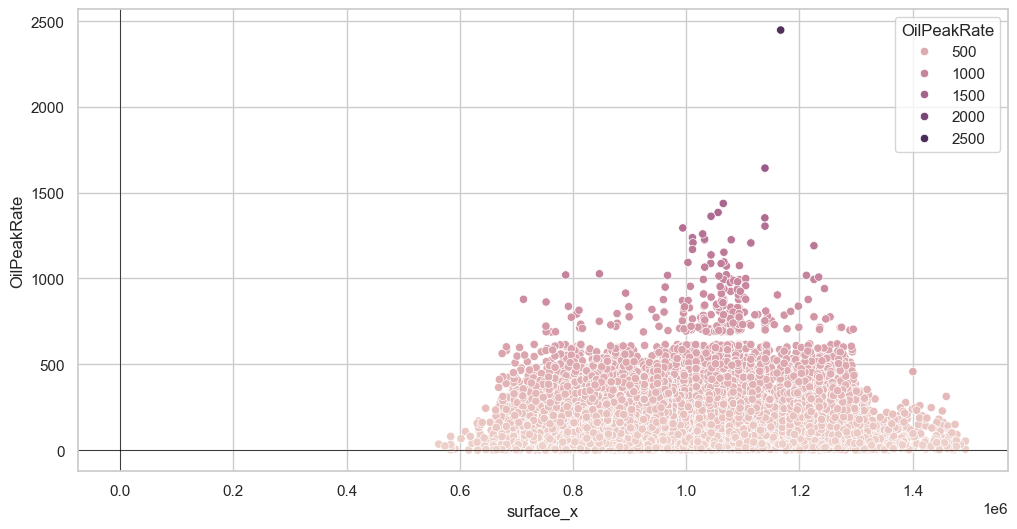

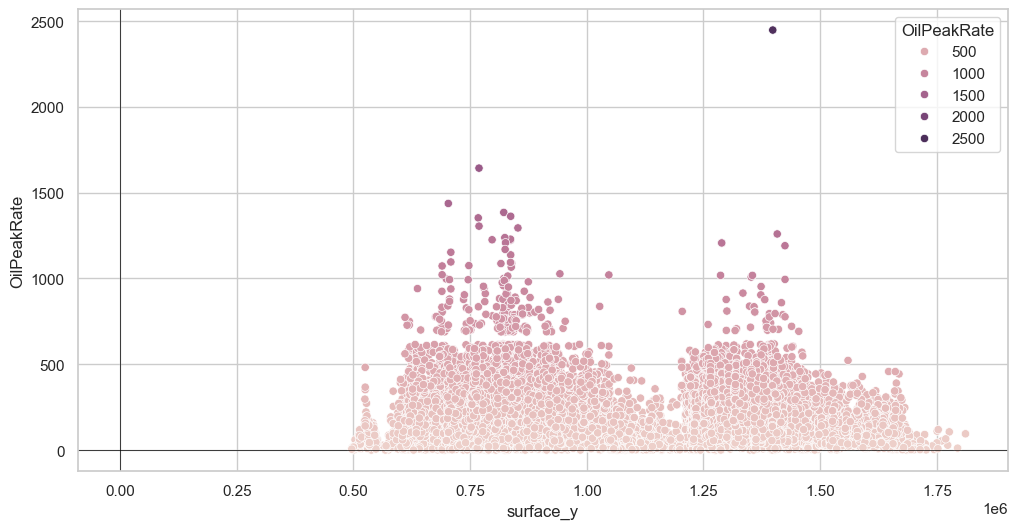

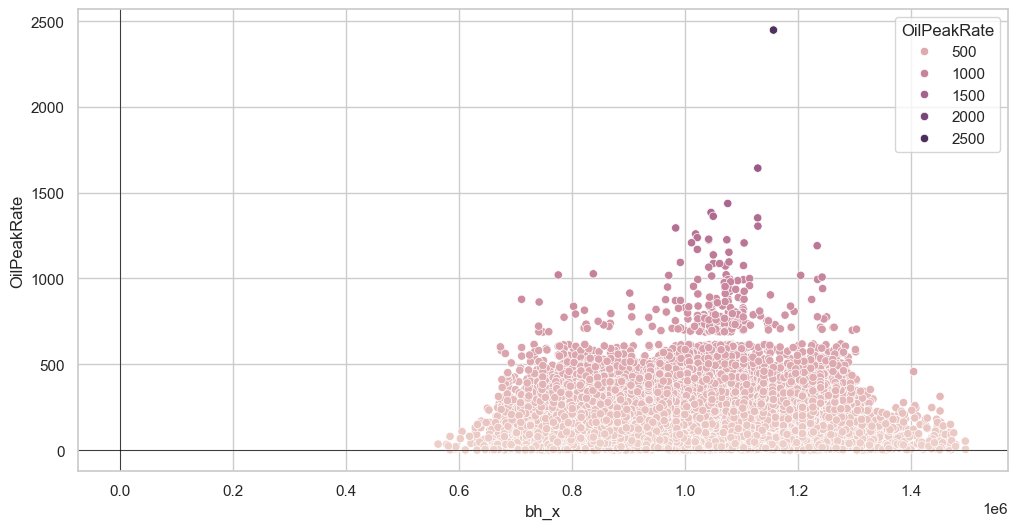

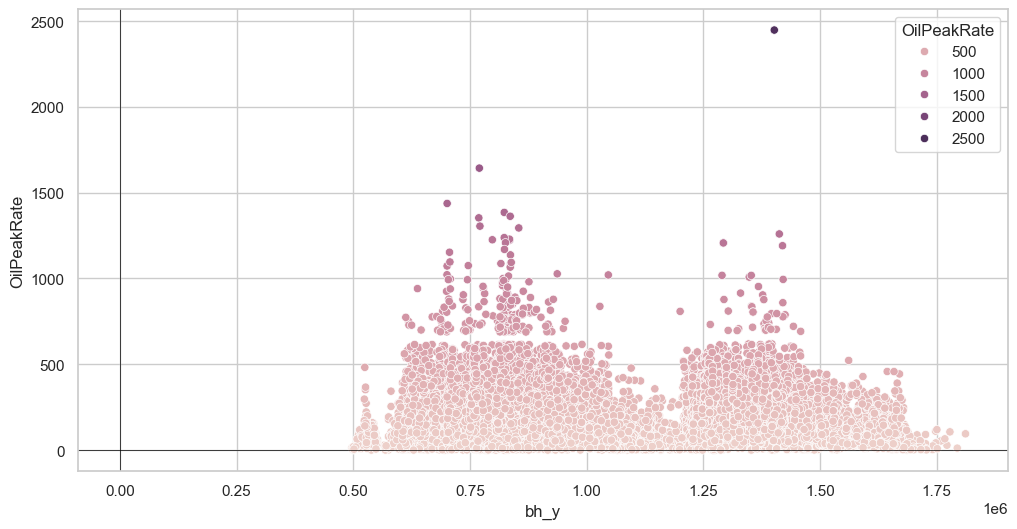

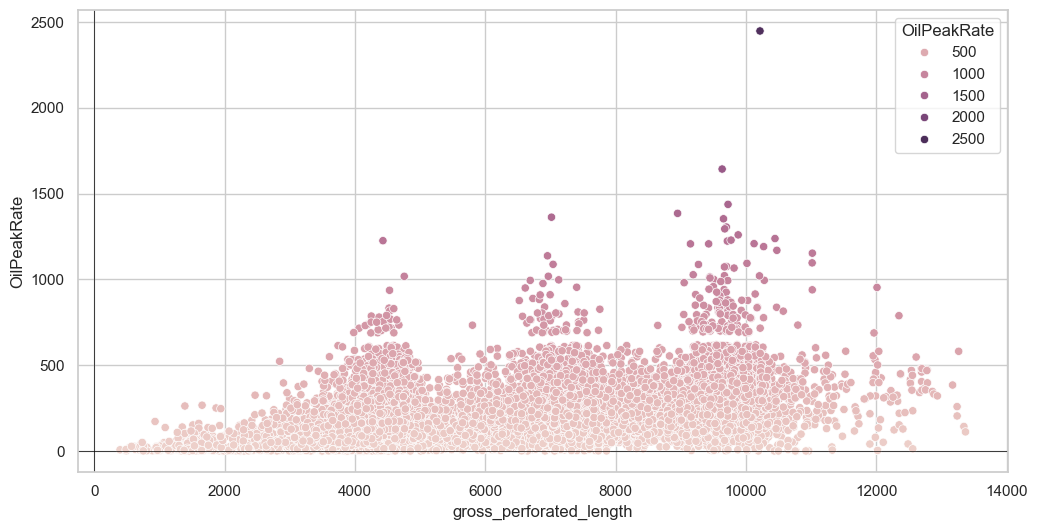

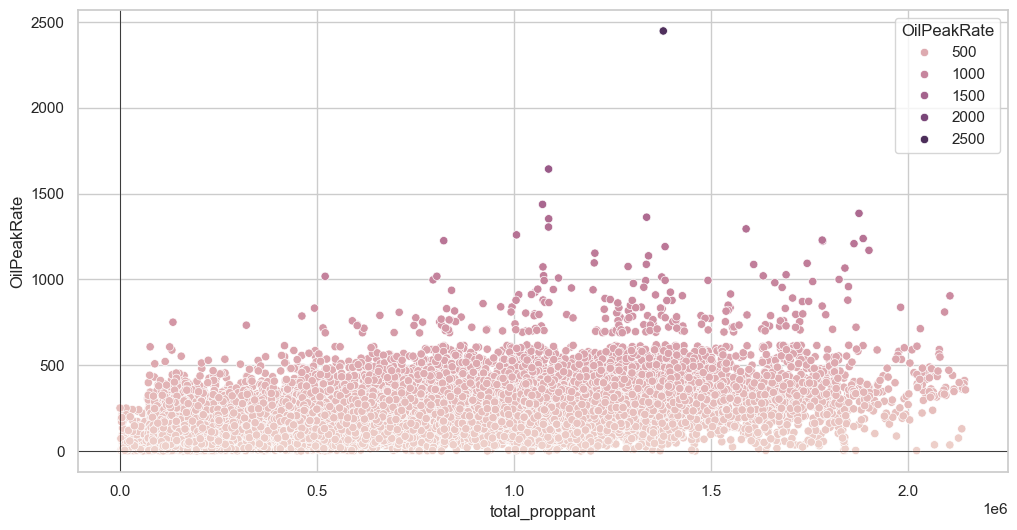

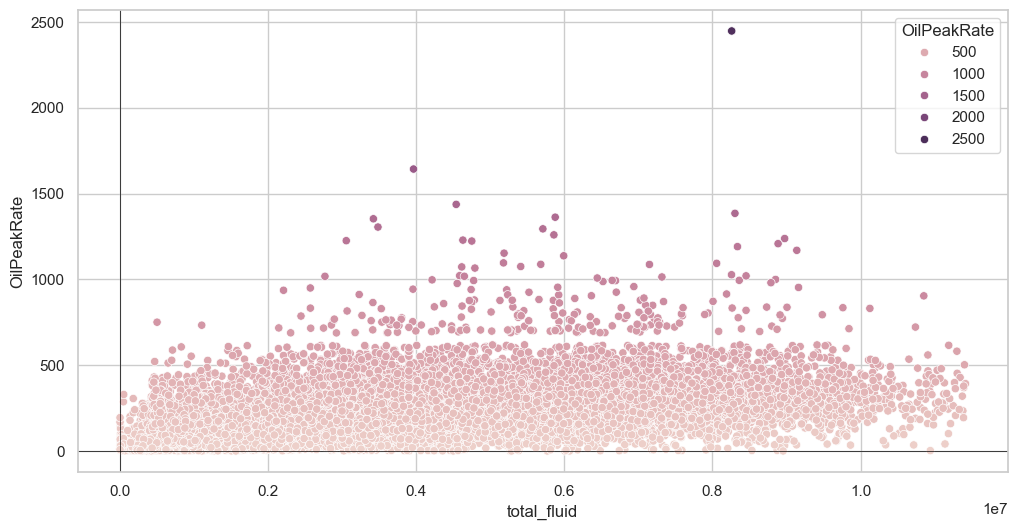

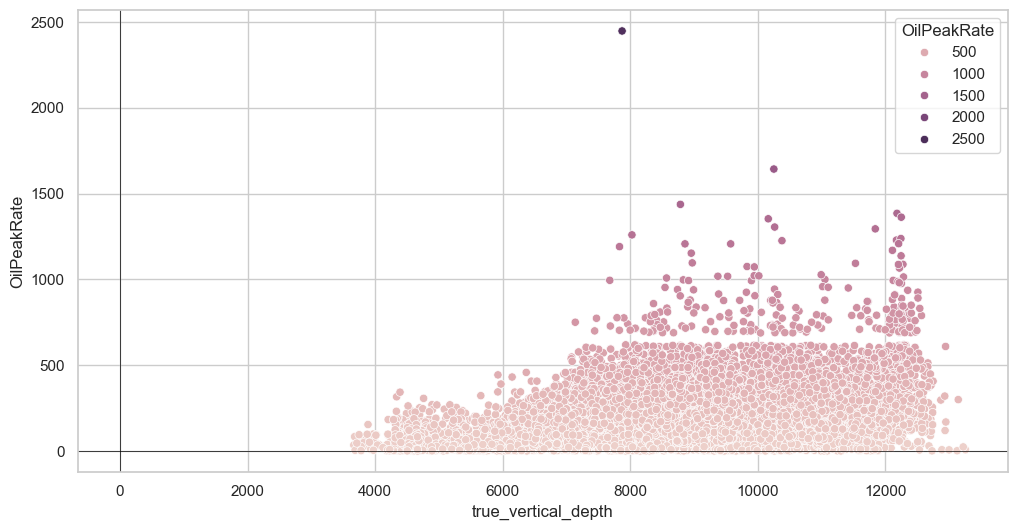

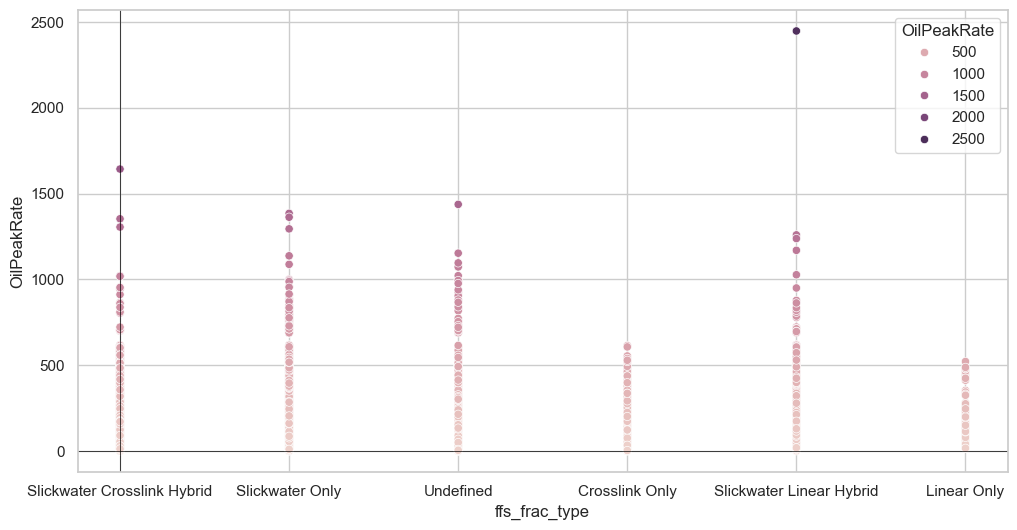

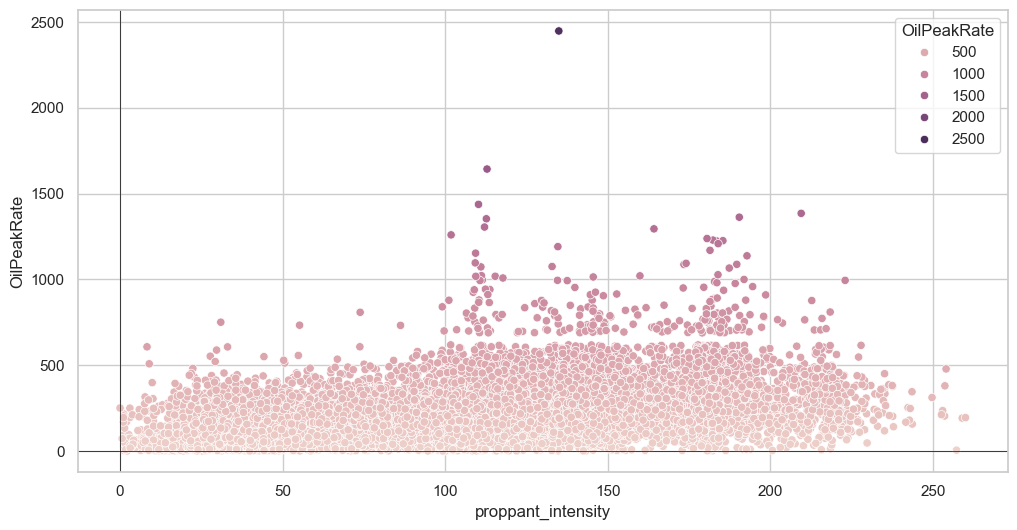

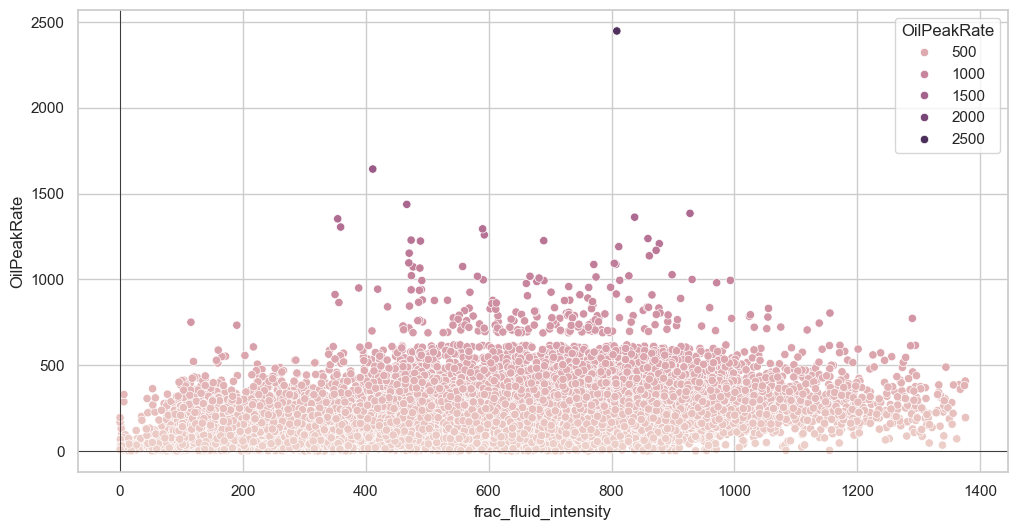

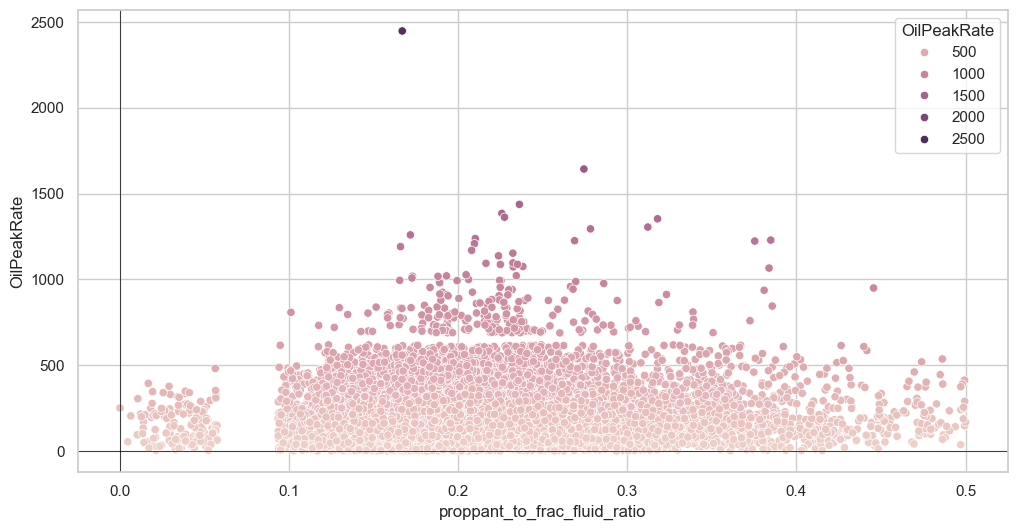

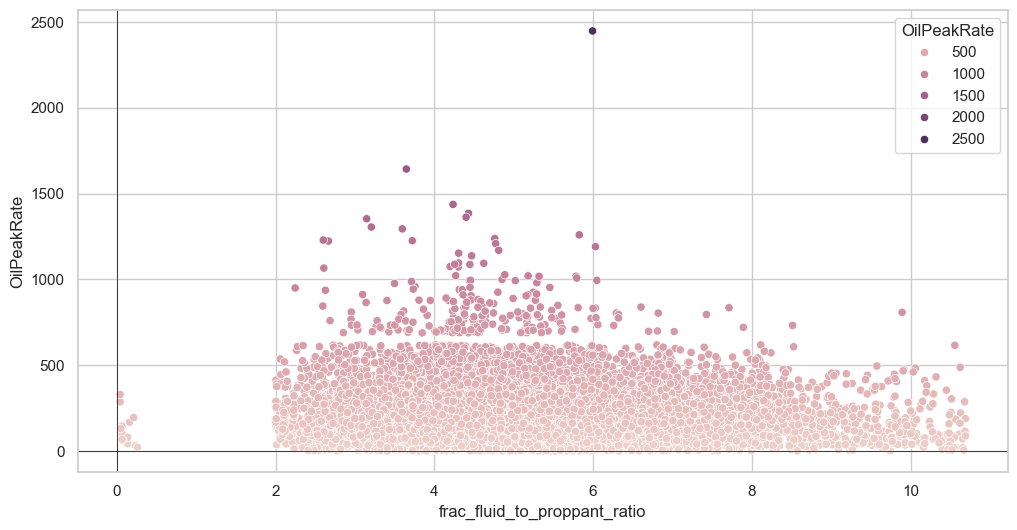

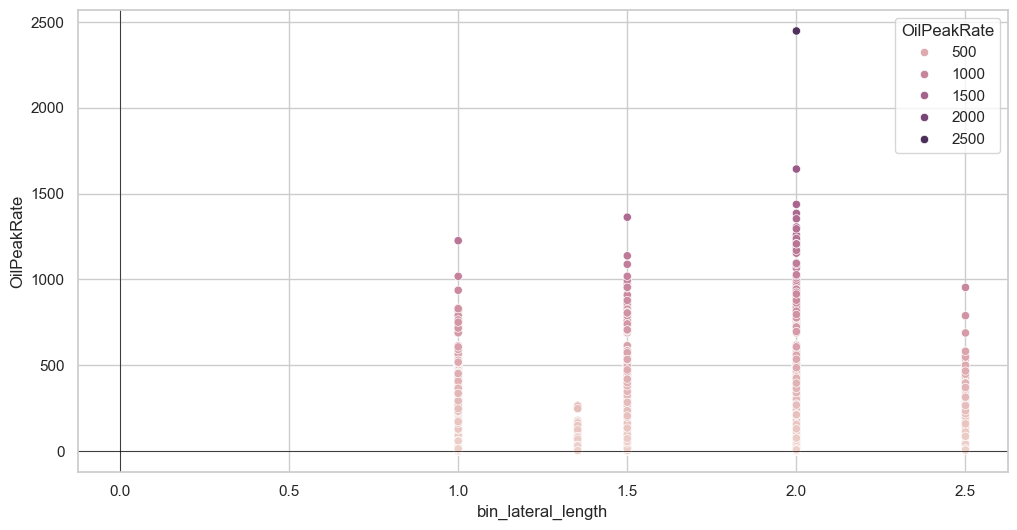

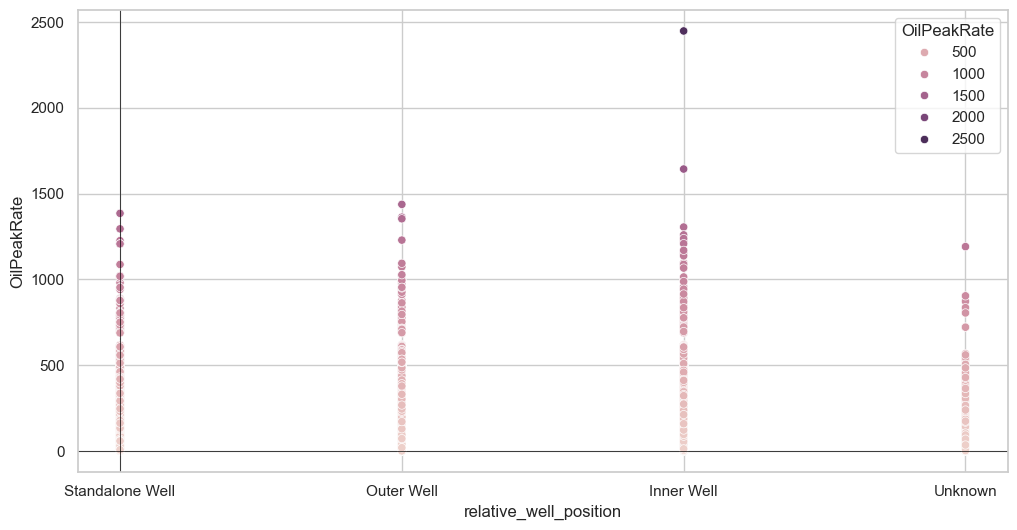

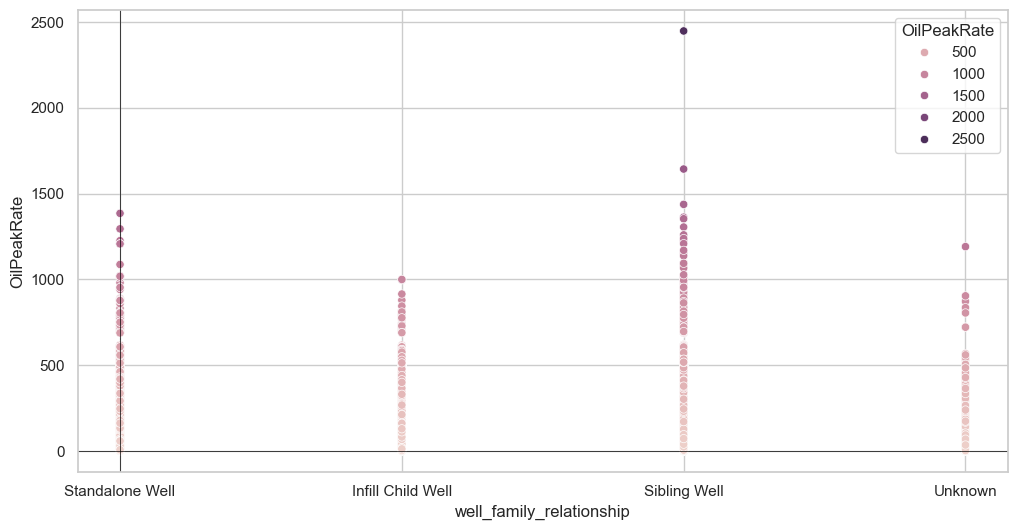

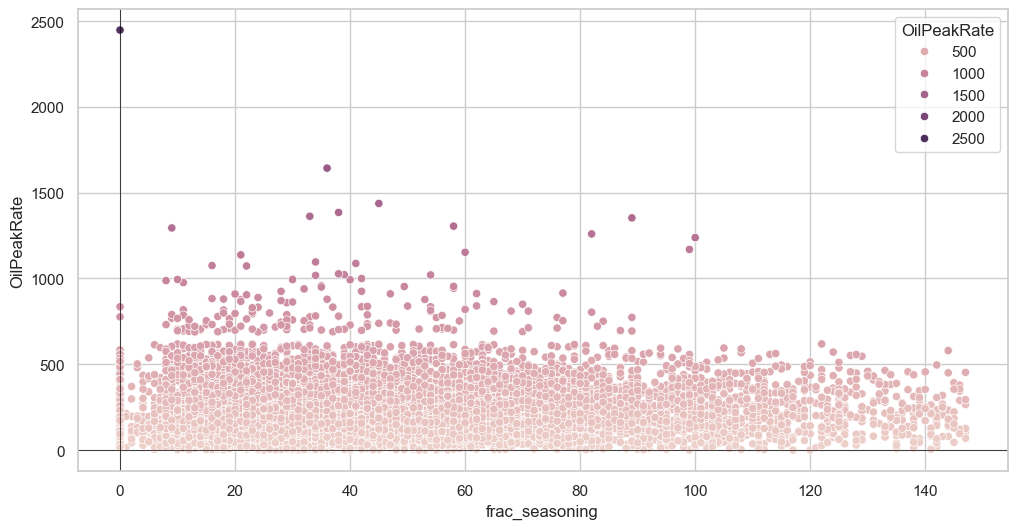

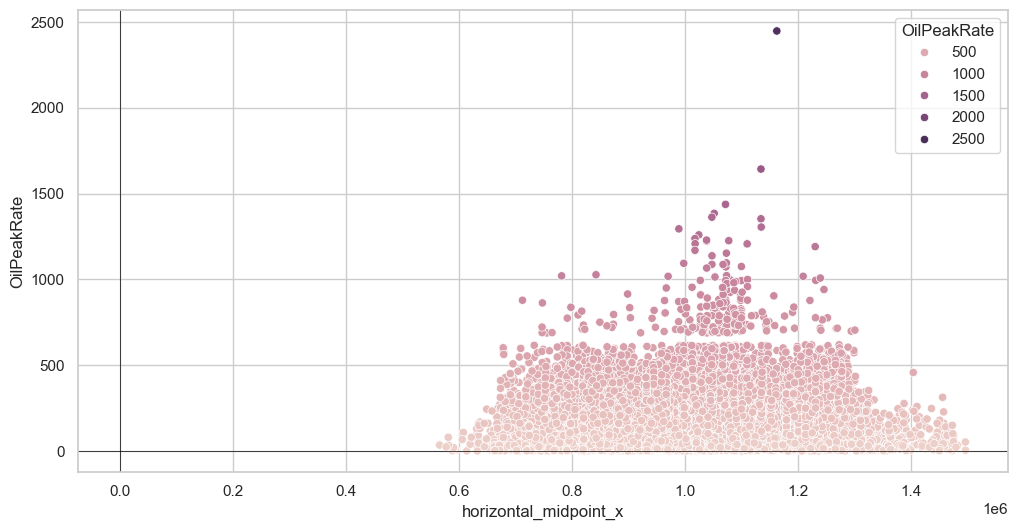

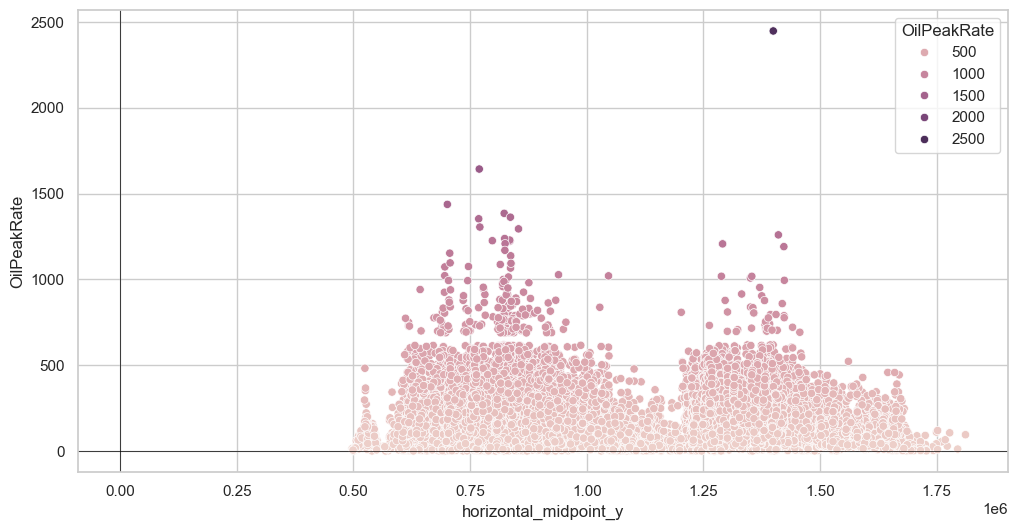

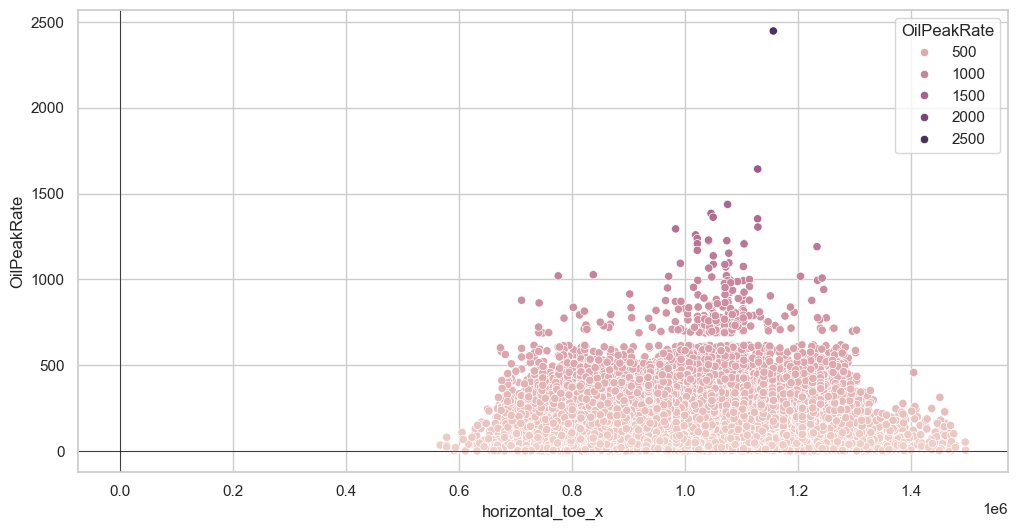

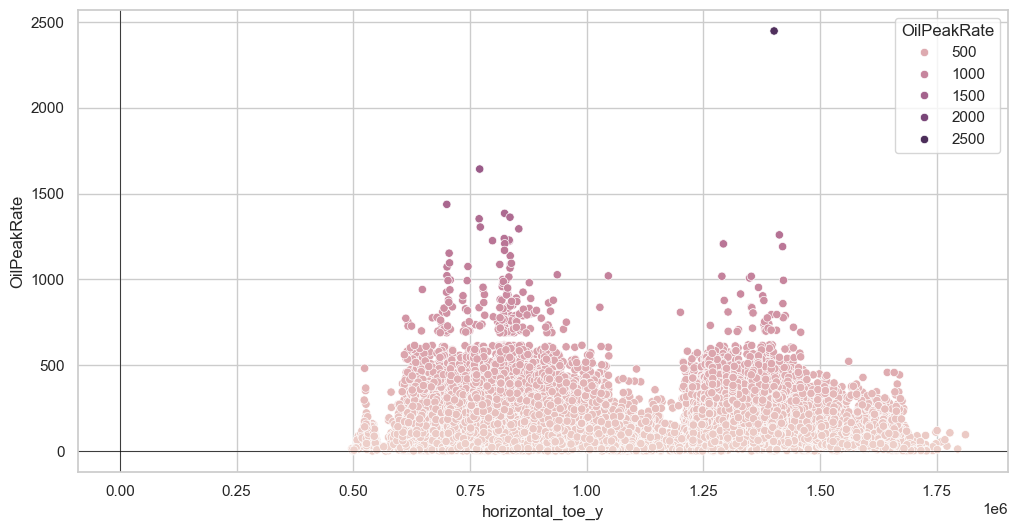

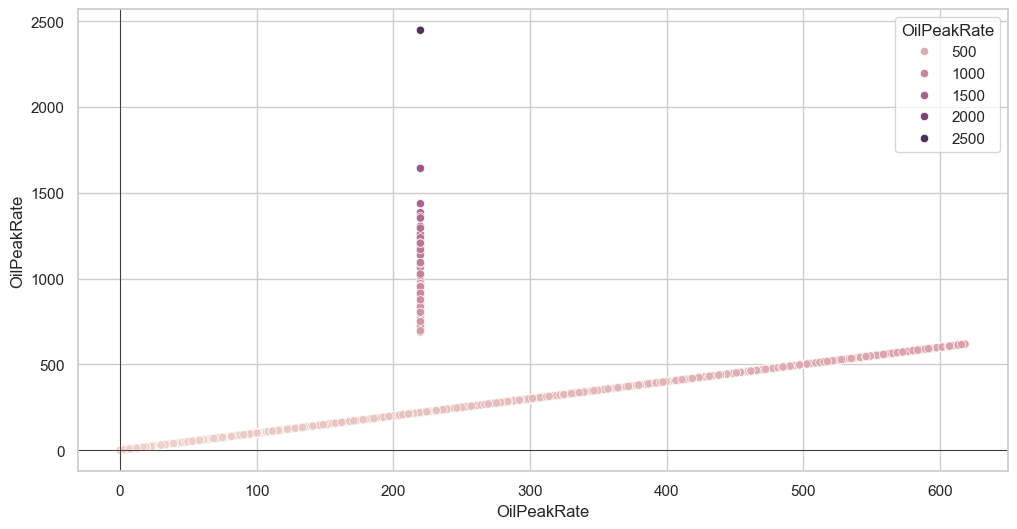

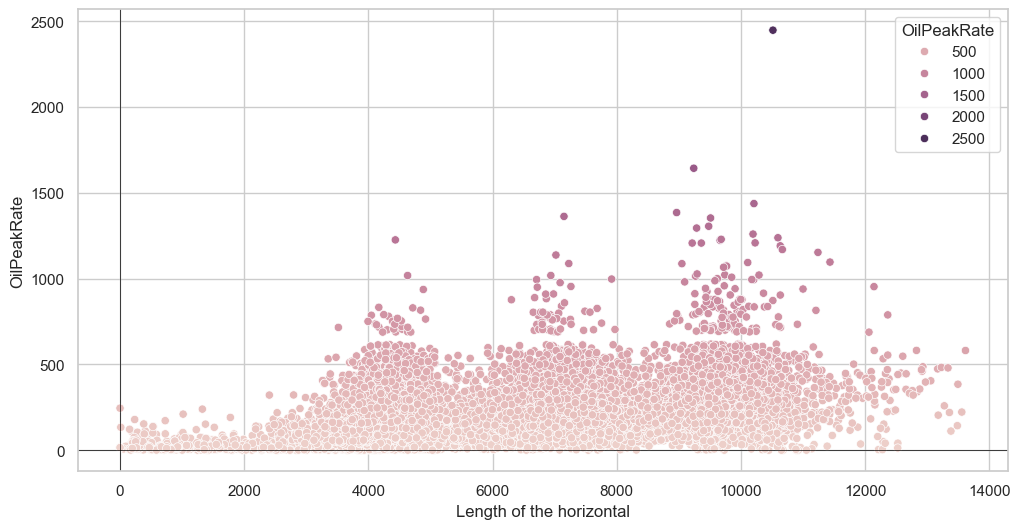

In [39]:
sns.color_palette("hls", 8)
for col in df.columns:
    sns.scatterplot(x=df[col],y=oil_peak_rate, marker='o', hue=oil_peak_rate)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    
    plt.show()
    


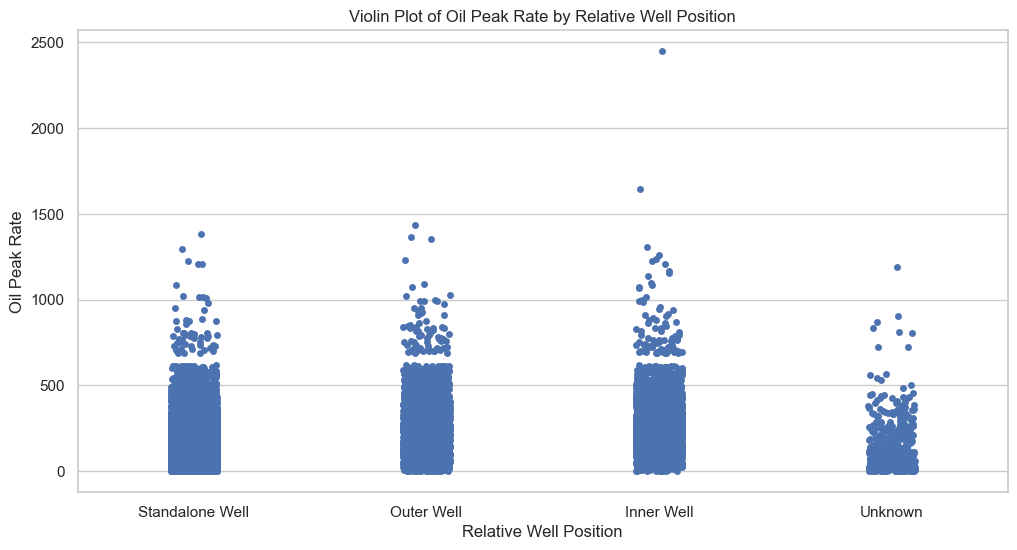

In [40]:

# Assuming 'OilPeakRate' and another categorical variable 'category' are in your dataset
sns.stripplot(x="relative_well_position", y=oil_peak_rate, data=df)
plt.title("Violin Plot of Oil Peak Rate by Relative Well Position")
plt.xlabel("Relative Well Position")
plt.ylabel("Oil Peak Rate")
plt.show()


# Feature Selection

In [41]:
from sklearn.model_selection import train_test_split

# df_2 = df.copy()
df_2 = df.drop(columns= ['horizontal_midpoint_x', 'horizontal_midpoint_y', 'horizontal_toe_x', 'horizontal_toe_y'])

df_2.replace([np.inf, -np.inf], np.nan, inplace=True)
print(df_2.shape)
df_2.dropna(inplace=True)
df_2 = pd.get_dummies(df_2, drop_first=True)
print(df_2.shape)
X = df_2.drop('OilPeakRate', axis=1)
y = df_2['OilPeakRate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


(18138, 19)
(12789, 27)


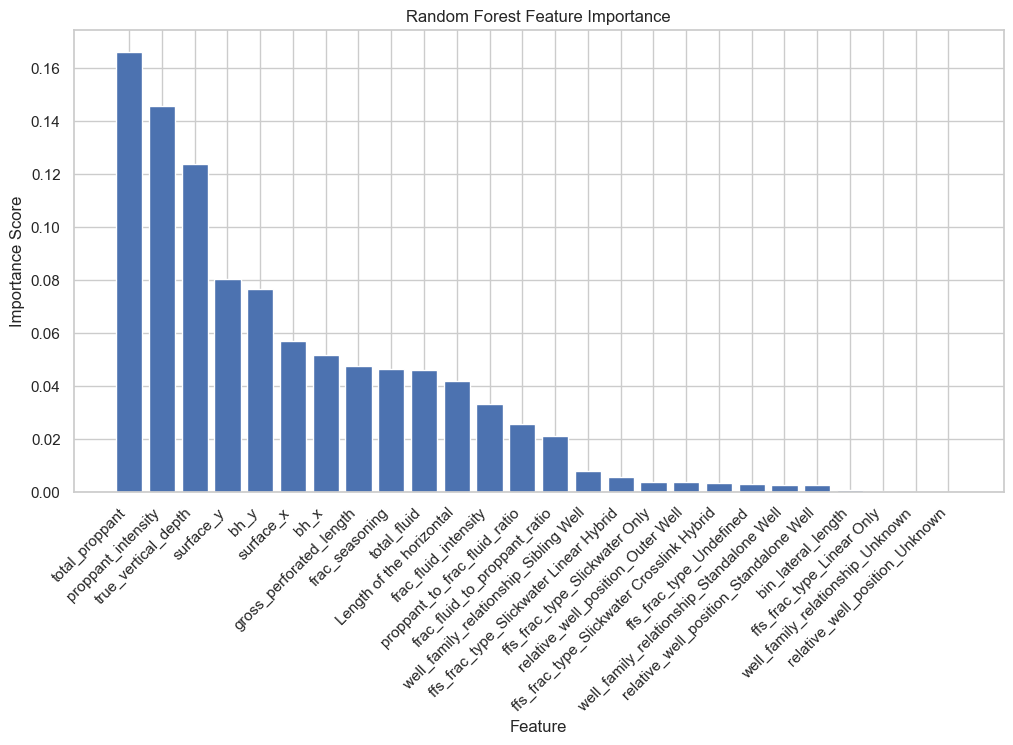

In [42]:
from sklearn.ensemble import RandomForestRegressor


# Create RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, random_state=101)

# Train the model on the training data
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Get the names of features
feature_names = X_train.columns

# Create a DataFrame to visualize feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


In [43]:

rf = RandomForestRegressor(n_estimators=100, random_state=101)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate mean absolute error
mae = mean_absolute_error(y_test, rf_pred)

# Calculate mean squared error
mse = mean_squared_error(y_test, rf_pred)

# Calculate root mean absolute error
rmae = np.sqrt(mae)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Print the results
print('RMAE:', rmae)
print('RMSE:', rmse)

RMAE: 8.102508253747901
RMSE: 87.27329115184608


In [44]:
from sklearn.model_selection import cross_val_score

# Create the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=101)

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the root mean squared error from cross-validation scores
cv_rmse = np.sqrt(-cv_scores)

# Print the cross-validation results
print('Cross-Validation RMSE:', cv_rmse)


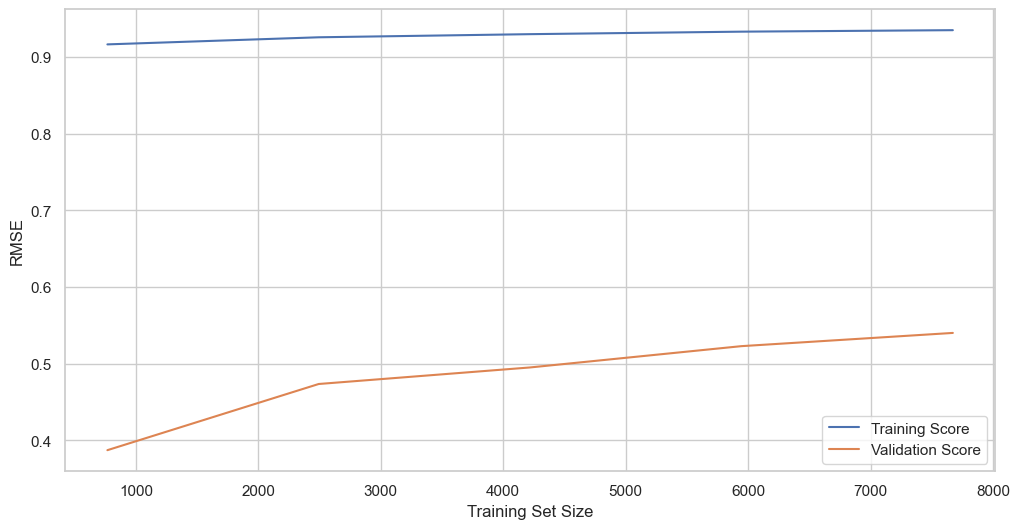

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Plot learning curves
train_sizes, train_scores, val_scores = learning_curve(rf, X_train, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()


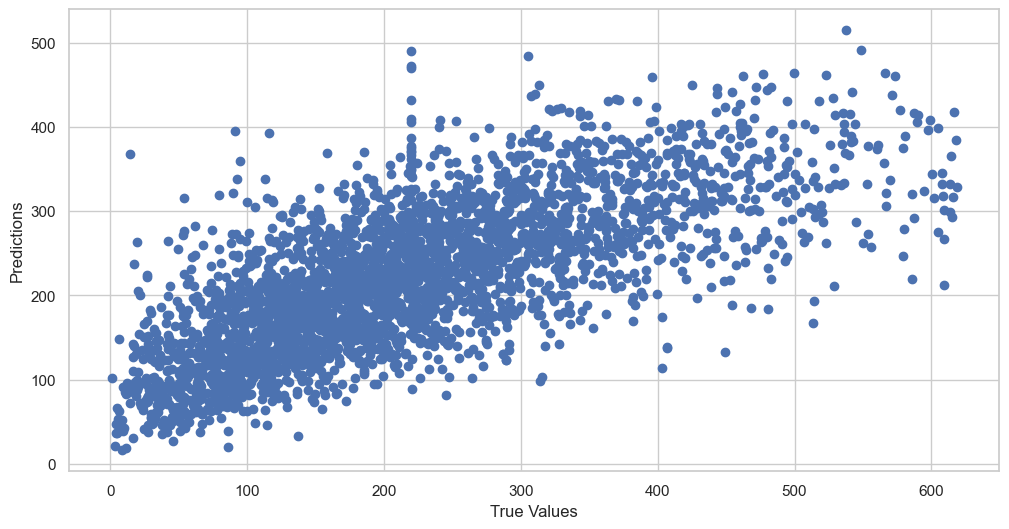

In [ ]:

plt.scatter(y_test, rf_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()